In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from dnn_tau import Dnn_tau
from data_extractor import Data_extractor_v2, output_vars_v2
import os
import fnmatch
from utils import normalize, bucketize, split_dataset
from copy import deepcopy
import pickle
from metrics import *
import matplotlib.pyplot as plt

## Selection of features

In [1]:
import pickle
denom = 100

channels = ['tee', 'tem', 'tmm', 'tte', 'ttm']
selected_vars = []

for channel in channels:
    with open('saved_results/new_results/TEST9_global_v4_all_channels_loss_shuffle_'+channel, 'rb') as file:
        fi = pickle.load(file)
    sorted_fi = sorted(fi.items(), key=lambda x: x[1], reverse=True)
    names = [item[0] for item in sorted_fi]
    values = [item[1][0] for item in sorted_fi]

    print(names[0])
    threshold = max(values[1:])/denom

    sel_values = [v for v in values if v > threshold]
    sel_names = names[:len(sel_values)]

    selected_vars.extend(sel_names)
    print(sel_names)

selected_vars = list(set(selected_vars))
print(selected_vars)
print(len(selected_vars))

filename = f"saved_results/selected_vars_threshold_{denom}_bis"
with open(filename, "wb") as file:
    pickle.dump(selected_vars, file)

mass_hyp
['mass_hyp', 'HNL_CM_mass_1', 'HNL_CM_mass_2', 'Mt_tot', 'pt_123', 'mass_23', 'mt_1MET', 'mass_123', 'pt_MET', 'mt_3MET', 'mt_2MET', 'pt_1', 'mt_12', 'HNL_CM_mass_with_MET_1', 'mass_13', 'HNL_CM_mass_with_MET_2', 'pt_2', 'mt_2(13)', 'mt_13', 'mt_3(1MET)', 'mass_12', 'pt_3', 'mt_1(2MET)', 'mt_23', 'mt_MET(23)', 'mt_2(1MET)', 'mt_3(12)', 'mt_MET(12)', 'mt_1(23)', 'mt_1(3MET)', 'mt_MET(13)']
mass_hyp
['mass_hyp', 'HNL_CM_mass_1', 'HNL_CM_mass_2', 'mt_3MET', 'mt_1MET', 'mt_2MET', 'mass_13', 'Mt_tot', 'mt_MET(13)', 'mt_2(1MET)', 'mt_12', 'mass_123', 'pt_MET', 'pt_123', 'mass_23', 'pt_1', 'mt_13', 'mass_12', 'mt_1(23)', 'HNL_CM_mass_with_MET_1', 'mt_23']
mass_hyp
['mass_hyp', 'HNL_CM_mass_1', 'HNL_CM_mass_2', 'Mt_tot', 'mass_23', 'pt_123', 'mt_3MET', 'mt_1MET', 'mass_123', 'pt_MET', 'pt_1', 'mt_2MET', 'mt_12', 'HNL_CM_mass_with_MET_1', 'mass_13', 'pt_2', 'HNL_CM_mass_with_MET_2', 'mt_1(2MET)', 'mt_13', 'mt_1(3MET)', 'mt_MET(23)', 'mass_12', 'mt_2(13)', 'mt_23', 'pt_3', 'mt_3(1MET)',

In [65]:
import pickle
import pandas as pd

channels = ['tee', 'tem', 'tmm', 'tte', 'ttm']
filename = "saved_results/selected_vars_threshold_150"
# name = "saved_results/new_results/TEST9_global_v4_all_channels_loss_shuffle_"
# name = "TEST9_sel1_test_loss_shuffle_"
name = "saved_results/new_results/TEST9_sel2_loss_shuffle_"

with open(filename, "rb") as file:
    selected_vars = pickle.load(file)

fi_dict = {}

for channel in channels:
    with open(name+channel, 'rb') as file:
        fi = pickle.load(file)
    fi = {key: value[0] for key, value in fi.items()}
    print(fi)
    fi_dict[channel] = {key: fi[key] for key in selected_vars if key in fi}
    
sums = []
for i in range(len(fi_dict[channels[0]])):
    sums.append(0)
sum_of_fi = dict(zip(fi_dict[channels[0]].keys(),sums))
for key in fi_dict[list(fi_dict.keys())[0]]:
    for channel in channels:
        sum_of_fi[key] += fi_dict[channel][key]
    
    for channel in channels:
        fi_dict[channel] = dict(sorted(fi_dict[channel].items(), key=lambda x: sum_of_fi[x[0]], reverse=True))

fi_df = pd.DataFrame(fi_dict)
print(len(fi_df))

{'mt_23': 0.006494969129562378, 'deltaphi_2(13)': 0.003057315945625305, 'mt_1(3MET)': 0.004293903708457947, 'deltaphi_2(3MET)': 0.0035449713468551636, 'pt_1': 0.008288726210594177, 'deltaphi_2(1MET)': 0.003986194729804993, 'mt_1(2MET)': 0.03767375648021698, 'mt_MET(23)': 0.001796036958694458, 'deltaphi_3(12)': 0.003379225730895996, 'mass_23': 0.07796309888362885, 'HNL_CM_mass_2': 0.16739898920059204, 'deltaphi_MET(23)': 0.005139946937561035, 'HNL_CM_mass_1': 0.2953774333000183, 'mass_13': 0.017961949110031128, 'mt_2MET': 0.0530274361371994, 'mt_3(12)': 0.015549853444099426, 'Mt_tot': 0.3118434250354767, 'HNL_CM_mass_with_MET_2': 0.002812430262565613, 'mt_2(1MET)': 0.010152995586395264, 'pt_123': 0.1172051727771759, 'mt_1MET': 0.06387798488140106, 'mt_3(2MET)': 0.006961345672607422, 'pt_2': 0.013174101710319519, 'mt_12': 0.016917794942855835, 'mt_13': 0.009706825017929077, 'mt_MET(12)': 0.004369497299194336, 'mt_2(3MET)': 0.010181784629821777, 'mass_hyp': 1.0171818137168884, 'pt_3': 0.0

In [66]:
for key in fi_df:
    fi_df[key] /= max(fi_df[key])

In [38]:
variable_symbols = {
    'charge_1'                      :   r"$\mathrm{Q^{l_1}}$",
    'charge_2'                      :   r"$\mathrm{Q^{l_2}}$",
    'charge_3'                      :   r"$\mathrm{Q^{l_3}}$",
    'pt_1'                          :   r"$\mathrm{p_T^{l_1}}$",
    'pt_2'                          :   r"$\mathrm{p_T^{l_2}}$",
    'pt_3'                          :   r"$\mathrm{p_T^{l_3}}$",
    'pt_MET'                        :   r"$\mathrm{p_T^{MET}}$",
    'eta_1'                         :   r"$\mathrm{\eta^{l_1}}$", 
    'eta_2'                         :   r"$\mathrm{\eta^{l_2}}$", 
    'eta_3'                         :   r"$\mathrm{\eta^{l_3}}$",
    'mass_1'                        :   r"$\mathrm{m^{l_1}}$", 
    'mass_2'                        :   r"$\mathrm{m^{l_2}}$", 
    'mass_3'                        :   r"$\mathrm{m^{l_3}}$", 
    'deltaphi_12'                   :   r"$\mathrm{\Delta\phi(l_1,l_2)}$",
    'deltaphi_13'                   :   r"$\mathrm{\Delta\phi(l_1,l_3)}$",
    'deltaphi_23'                   :   r"$\mathrm{\Delta\phi(l_2,l_3)}$",
    'deltaphi_1MET'                 :   r"$\mathrm{\Delta\phi(l_1,MET)}$",
    'deltaphi_2MET'                 :   r"$\mathrm{\Delta\phi(l_2,MET)}$",
    'deltaphi_3MET'                 :   r"$\mathrm{\Delta\phi(l_3,MET)}$",
    'deltaphi_1(23)'                :   r"$\mathrm{\Delta\phi(l_1, l_2+l_3)}$",
    'deltaphi_2(13)'                :   r"$\mathrm{\Delta\phi(l_2, l_1+l_3)}$",
    'deltaphi_3(12)'                :   r"$\mathrm{\Delta\phi(l_3, l_1+l_2)}$",
    'deltaphi_MET(12)'              :   r"$\mathrm{\Delta\phi(MET, l_1+l_2)}$",
    'deltaphi_MET(13)'              :   r"$\mathrm{\Delta\phi(MET, l_1+l_3)}$",
    'deltaphi_MET(23)'              :   r"$\mathrm{\Delta\phi(MET, l_2+l_3)}$",
    'deltaphi_1(2MET)'              :   r"$\mathrm{\Delta\phi(l_1, l_2+MET)}$",
    'deltaphi_1(3MET)'              :   r"$\mathrm{\Delta\phi(l_1, l_3+MET)}$",
    'deltaphi_2(1MET)'              :   r"$\mathrm{\Delta\phi(l_2, l_1+MET)}$",
    'deltaphi_2(3MET)'              :   r"$\mathrm{\Delta\phi(l_2, l_3+MET)}$",
    'deltaphi_3(1MET)'              :   r"$\mathrm{\Delta\phi(l_3, l_1+MET)}$",
    'deltaphi_3(2MET)'              :   r"$\mathrm{\Delta\phi(l_3, l_2+MET)}$",
    'deltaeta_12'                   :   r"$\mathrm{\Delta\eta(l_1, l_2)}$",
    'deltaeta_13'                   :   r"$\mathrm{\Delta\eta(l_1, l_3)}$",
    'deltaeta_23'                   :   r"$\mathrm{\Delta\eta(l_2, l_3)}$",
    'deltaeta_1(23)'                :   r"$\mathrm{\Delta\eta(l_1, l_2+l_3)}$",
    'deltaeta_2(13)'                :   r"$\mathrm{\Delta\eta(l_2, l_1+l_3)}$",
    'deltaeta_3(12)'                :   r"$\mathrm{\Delta\eta(l_3, l_1+l_2)}$",
    'deltaR_12'                     :   r"$\mathrm{\Delta R(l_1, l_2)}$",
    'deltaR_13'                     :   r"$\mathrm{\Delta R(l_1, l_3)}$",
    'deltaR_23'                     :   r"$\mathrm{\Delta R(l_2, l_3)}$",
    'deltaR_1(23)'                  :   r"$\mathrm{\Delta R(l_1, l_2+l_3)}$",
    'deltaR_2(13)'                  :   r"$\mathrm{\Delta R(l_2, l_1+l_3)}$",
    'deltaR_3(12)'                  :   r"$\mathrm{\Delta R(l_3, l_1+l_2)}$",
    'mt_12'                         :   r"$\mathrm{m_T(l_1, l_2)}$",
    'mt_13'                         :   r"$\mathrm{m_T(l_1, l_3)}$",
    'mt_23'                         :   r"$\mathrm{m_T(l_2, l_3)}$",
    'mt_1MET'                       :   r"$\mathrm{m_T(l_1, MET)}$",
    'mt_2MET'                       :   r"$\mathrm{m_T(l_2, MET)}$",
    'mt_3MET'                       :   r"$\mathrm{m_T(l_3, MET)}$",
    'mt_1(23)'                      :   r"$\mathrm{m_T(l_1, l_2+l_3)}$",
    'mt_2(13)'                      :   r"$\mathrm{m_T(l_2, l_1+l_3)}$",
    'mt_3(12)'                      :   r"$\mathrm{m_T(l_3, l_1+l_2)}$",
    'mt_MET(12)'                    :   r"$\mathrm{m_T(MET, l_1+l_2)}$",
    'mt_MET(13)'                    :   r"$\mathrm{m_T(MET, l_1+l_3)}$",
    'mt_MET(23)'                    :   r"$\mathrm{m_T(MET, l_2+l_3)}$",
    'mt_1(2MET)'                    :   r"$\mathrm{m_T(l_1, l_2+MET)}$",
    'mt_1(3MET)'                    :   r"$\mathrm{m_T(l_1, l_3+MET)}$",
    'mt_2(1MET)'                    :   r"$\mathrm{m_T(l_2, l_1+MET)}$",
    'mt_2(3MET)'                    :   r"$\mathrm{m_T(l_2, l_3+MET)}$",
    'mt_3(1MET)'                    :   r"$\mathrm{m_T(l_3, l_1+MET)}$",
    'mt_3(2MET)'                    :   r"$\mathrm{m_T(l_3, l_2+MET)}$",
    'mass_12'                       :   r"$\mathrm{m(l_1+l_2)}$",
    'mass_13'                       :   r"$\mathrm{m(l_1+l_3)}$",
    'mass_23'                       :   r"$\mathrm{m(l_2+l_3)}$",
    'mass_123'                      :   r"$\mathrm{m(l_1+l_2+l_3)}$",
    'Mt_tot'                        :   r"$\mathrm{M_T^{total}}$",
    'pt_123'                        :   r"$\mathrm{\sum_{i}p_T^{l_i}}$",
    'HNL_CM_angle_with_MET_1'       :   r"$\mathrm{\alpha_{HNL,1}$",
    'HNL_CM_angle_with_MET_2'       :   r"$\mathrm{\alpha_{HNL,2}$",
    'W_CM_angle_to_plane_1'         :   r"$\mathrm{\beta_{HNL,1}}$", 
    'W_CM_angle_to_plane_2'         :   r"$\mathrm{\beta_{HNL,2}}$", 
    'W_CM_angle_to_plane_with_MET_1':   r"$\mathrm{\tilde{\beta}_{HNL,1}}$", 
    'W_CM_angle_to_plane_with_MET_2':   r"$\mathrm{\tilde{\beta}_{HNL,2}}$",
    'HNL_CM_mass_1'                 :   r"$\mathrm{m_{HNL,1}}$",
    'HNL_CM_mass_2'                 :   r"$\mathrm{m_{HNL,2}}$",
    'HNL_CM_mass_with_MET_1'        :   r"$\mathrm{\tilde{m}_{HNL,1}}$",
    'HNL_CM_mass_with_MET_2'        :   r"$\mathrm{\tilde{m}_{HNL,2}}$",
    'W_CM_angle_12'                 :   r"$\mathrm{\gamma(l_1, l_2)}$",
    'W_CM_angle_13'                 :   r"$\mathrm{\gamma(l_1, l_3)}$", 
    'W_CM_angle_23'                 :   r"$\mathrm{\gamma(l_2, l_3)}$", 
    'W_CM_angle_1MET'               :   r"$\mathrm{\gamma(l_1, MET)}$", 
    'W_CM_angle_2MET'               :   r"$\mathrm{\gamma(l_2, MET)}$", 
    'W_CM_angle_3MET'               :   r"$\mathrm{\gamma(l_3, MET)}$",
    'mass_hyp'                      :   r"$\mathrm{m_{HNL}^{hyp}}$"
}

In [15]:
with open('extracted_data/variable_symbols', 'wb') as file:
    pickle.dump(variable_symbols, file)

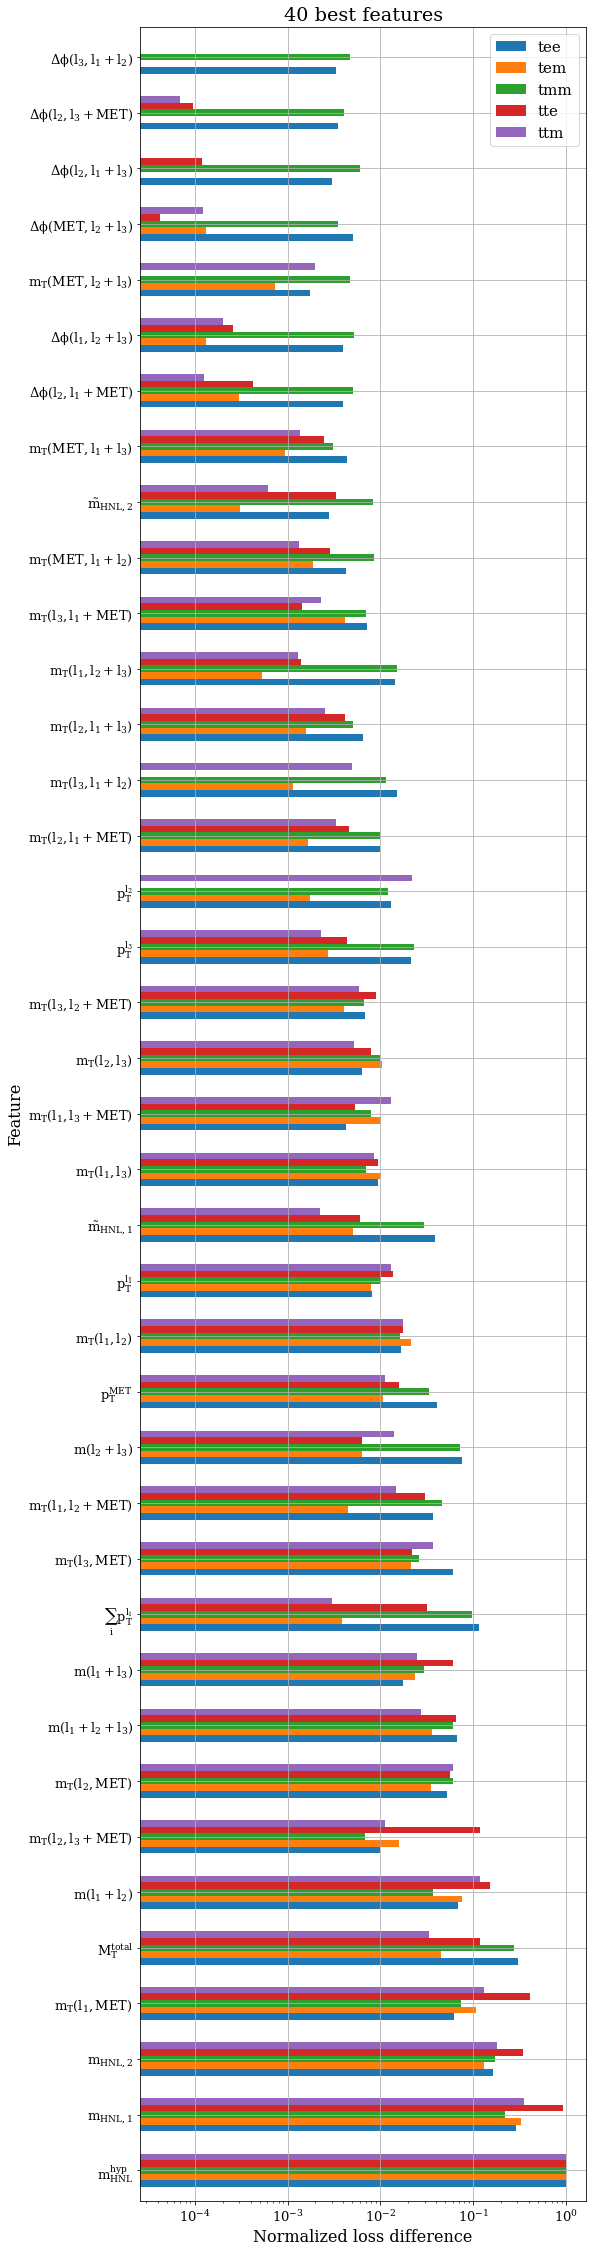

In [67]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({"font.size": 16, "font.family": "serif"})

feature_labels = []
for feature in fi_df.index:
    feature_labels.append(variable_symbols[feature])

fig, ax = plt.subplots(figsize=(8, 40))
fi_df.plot.barh(ax=ax, width=0.6)
ax.set_xlabel('Normalized loss difference', fontsize=16)
ax.set_ylabel('Feature', fontsize=16)
ax.set_yticklabels(feature_labels, math_fontfamily='dejavuserif')
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(fontsize=15)
ax.set_xscale('log')
ax.grid()
ax.set_title('40 best features')

for label in ax.get_yticklabels():
    label.set_fontsize(13)

# fig.savefig("Images/TEST9_global_v4_fi.pdf", bbox_inches = 'tight')
# fig.savefig("Images/TEST9_sel1_fi.pdf", bbox_inches = 'tight')
fig.savefig("Images/TEST9_sel2_fi.pdf", bbox_inches = 'tight')